# Summary

# Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("./train_cleaned.csv")
test_data = pd.read_csv("./test_cleaned.csv")
corr_matrix = train_data.corr()
print(corr_matrix["TenYearCHD"].sort_values(ascending = False))

TenYearCHD         1.000000
age                0.225568
sysBP              0.205898
prevalentHyp       0.163910
diaBP              0.133094
glucose            0.124403
diabetes           0.105644
totChol            0.099083
sex                0.097138
BPMeds             0.090762
BMI                0.071823
prevalentStroke    0.062357
cigsPerDay         0.046104
heartRate          0.023205
currentSmoker      0.001644
education         -0.052207
Name: TenYearCHD, dtype: float64


# Results

### Decision Tree

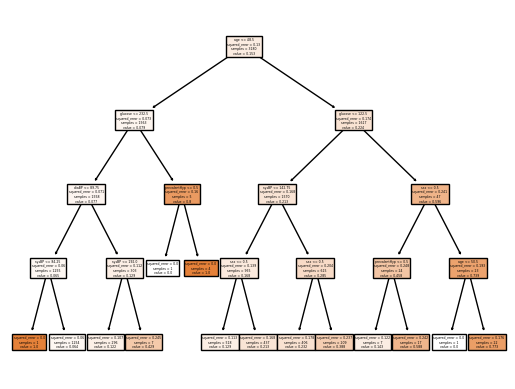

In [2]:
from sklearn import tree
from sklearn import metrics 

vars = ['age', 'sex', 'prevalentHyp', 'diaBP', 'glucose', 'diabetes', 'sysBP']

X_train = train_data.loc[:, vars]
Y_train = train_data.loc[:, "TenYearCHD"]

cart = tree.DecisionTreeRegressor(max_depth=4)
cart.fit(X_train, Y_train)
tree.plot_tree(cart,filled=True,feature_names=vars) 
plt.show()

/Users/Amogh/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


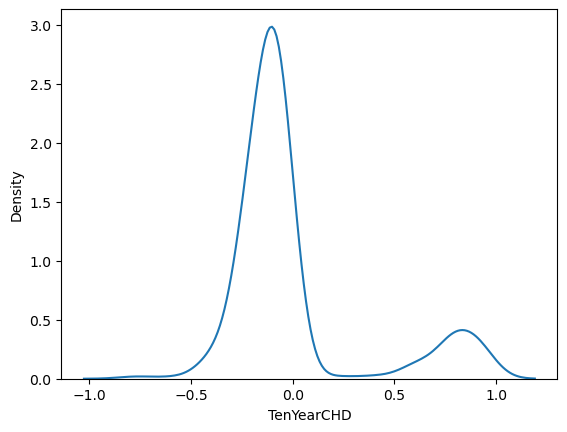

Rsq:  0.0764710218018847 

RMSE:  0.3406389824542868 

R2:  0.07622061758006637 



In [3]:
X_test = test_data.loc[:, vars]
Y_test = test_data.loc[:, "TenYearCHD"]
Y_hat = cart.predict(X_test)

e = Y_test - Y_hat
sns.kdeplot(e)
plt.show()
rsq = 1 - np.sum(e**2)/np.sum((Y_test - np.mean(Y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq, '\n')
print('RMSE: ', RMSE, '\n')

r2 = metrics.r2_score(Y_test, Y_hat)
print('R2: ', r2, '\n')

### Linear Model

In [4]:
from sklearn.linear_model import LinearRegression

vars = ['age', 'cigsPerDay', 'sysBP', 'BMI', 'heartRate', 'glucose', 'prevalentStroke', 'prevalentHyp']
X_train = train_data.loc[:, vars]
Y_train = train_data.loc[:, "TenYearCHD"]
X_test = test_data.loc[:, vars]
Y_test = test_data.loc[:, "TenYearCHD"]

model = LinearRegression()
lm = model.fit(X_train,Y_train)
Y_hat = lm.predict(X_test)
linear_rsq = metrics.r2_score(Y_test, Y_hat)
print(linear_rsq)

0.10073343020200798
